In [1]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy import stats
from matplotlib.pyplot import figure
import json
import requests
import time
import pprint
import datetime
from sklearn.metrics import r2_score

#Fred Key
from config import fred_api

# 25 - Year Prime and Mortgage Rates from FRED API

In [2]:
#settings for 25 year Prime Rate API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MPRIME",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"1998-02-01",
    "observation_end":"2023-02-01",
}

In [3]:
#make the request
response=requests.get((base_url+request_type),params=params)
MPRIME_25_data=response.json()

In [4]:
#get the list of observations
prime_25_points=MPRIME_25_data["observations"]
#display a few observations to confirm 
prime_25_points[0:5]

[{'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-02-01',
  'value': '8.50'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-03-01',
  'value': '8.50'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-04-01',
  'value': '8.50'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-05-01',
  'value': '8.50'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-06-01',
  'value': '8.50'}]

In [5]:
#process the list of observations, extracting the date and rate value
prime_25_date=[]
prime_25_rate=[]
for point in prime_25_points:
    prime_25_date.append(point["date"])
    prime_25_rate.append(point["value"])

In [6]:
#create a DataFrame to store the Lists
#vertically oriented 
_25year_df=pd.DataFrame(
    {"Dates":prime_25_date,
    "Prime Rate":prime_25_rate})
_25year_df.set_index(["Dates"], inplace=True)
_25year_df.head()

,Prime Rate
Dates,
1998-02-01,8.50
1998-03-01,8.50
1998-04-01,8.50
1998-05-01,8.50
1998-06-01,8.50


In [7]:
#settings for 25 years of 30-year mortgage API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MORTGAGE30US",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"1998-02-01",
    "observation_end":"2023-02-01",
    "frequency":"m",
    "aggregation_method":"avg"
}

In [8]:
#make the request
response=requests.get((base_url+request_type),params=params)
M30_25_data=response.json()

In [9]:
#get the list of observations
M30_25_points=M30_25_data["observations"]
#display a few observations to confirm 
M30_25_points[0:5]

[{'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-02-01',
  'value': '7.04'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-03-01',
  'value': '7.13'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-04-01',
  'value': '7.14'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-05-01',
  'value': '7.14'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '1998-06-01',
  'value': '7.00'}]

In [10]:
#process the list of observations, extracting the rate value
M30_25_rates=[]
for point in M30_25_points:
    M30_25_rates.append(point["value"])

In [11]:
#Add 30-yr Mortgage rates to 25 year DF
_25year_df["30-Yr Mortgage Rate"]=M30_25_rates
_25year_df.head()

,Prime Rate,30-Yr Mortgage Rate
Dates,,
1998-02-01,8.50,7.04
1998-03-01,8.50,7.13
1998-04-01,8.50,7.14
1998-05-01,8.50,7.14
1998-06-01,8.50,7.00


# 5 - Year Prime and Mortgage Rates From FRED API

In [12]:
#settings for Prime Rate API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MPRIME",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"2018-09-01",
    "observation_end":"2023-02-01",
}

In [13]:
#make the request
response=requests.get((base_url+request_type),params=params)
MPRIME_data=response.json()

In [14]:
#get the list of observations
prime_points=MPRIME_data["observations"]
#display a few observations to confirm 
prime_points[0:5]

[{'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2018-09-01',
  'value': '5.03'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2018-10-01',
  'value': '5.25'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2018-11-01',
  'value': '5.25'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2018-12-01',
  'value': '5.35'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2019-01-01',
  'value': '5.50'}]

In [15]:
#process the list of observations, extracting the date and rate value
prime_date=[]
prime_rate=[]
for point in prime_points:
    prime_date.append(point["date"])
    prime_rate.append(point["value"])

In [16]:
#create DataFrames to store the Lists
#vertically oriented 
prime_virt_df=pd.DataFrame(
    {"Dates":prime_date,
    "Prime Rate":prime_rate})
prime_virt_df.set_index(["Dates"], inplace=True)
prime_virt_df.head()

,Prime Rate
Dates,
2018-09-01,5.03
2018-10-01,5.25
2018-11-01,5.25
2018-12-01,5.35
2019-01-01,5.50


In [17]:
#horizontally oriented
prime_horz_df=pd.DataFrame([prime_rate])
prime_horz_df.columns=prime_date
prime_horz_df.index=["Prime Rate"]
prime_horz_df

,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
Prime Rate,5.03,5.25,5.25,5.35,5.50,5.50,5.50,5.50,5.50,5.50,...,3.94,4.38,4.85,5.50,5.73,6.25,6.95,7.27,7.50,7.74


In [18]:
#settings for 30 year mortgage API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MORTGAGE30US",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"2018-09-01",
    "observation_end":"2023-02-01",
    "frequency":"m",
    "aggregation_method":"avg"
}

In [19]:
#make the request
response=requests.get((base_url+request_type),params=params)
M30_data=response.json()

In [20]:
#get the list of observations
M30_points=M30_data["observations"]
#display a few observations to confirm 
M30_points[0:5]

[{'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2018-09-01',
  'value': '4.63'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2018-10-01',
  'value': '4.83'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2018-11-01',
  'value': '4.87'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2018-12-01',
  'value': '4.64'},
 {'realtime_start': '2023-04-10',
  'realtime_end': '2023-04-10',
  'date': '2019-01-01',
  'value': '4.46'}]

In [21]:
#process the list of observations, extracting the date and rate value
M30_dates=[]
M30_rates=[]
for point in M30_points:
    M30_dates.append(point["date"])
    M30_rates.append(point["value"])

In [22]:
#create DataFrames to store the Lists
#vertically oriented 
M30_virt_df=pd.DataFrame(
    {"Dates":M30_dates,
    "30-Yr Mortgage Rate":M30_rates})
M30_virt_df.set_index(["Dates"], inplace=True)
M30_virt_df.head()

,30-Yr Mortgage Rate
Dates,
2018-09-01,4.63
2018-10-01,4.83
2018-11-01,4.87
2018-12-01,4.64
2019-01-01,4.46


In [23]:
#horizontally oriented
M30_horz_df=pd.DataFrame([M30_rates])
M30_horz_df.columns=M30_dates
M30_horz_df.index=["30-Yr Mortgage Rate"]
M30_horz_df

,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
30-Yr Mortgage Rate,4.63,4.83,4.87,4.64,4.46,4.37,4.27,4.14,4.07,3.80,...,5.23,5.52,5.41,5.22,6.11,6.90,6.81,6.36,6.27,6.26


# Read In Cleaned Zillow CSVs

In [24]:
# Read in cleaned Median List Price csv from group data folder
median_list_to_load = 'data/lr_cleaned_mlp.csv'
lr_median_list_price = pd.read_csv(median_list_to_load)
lr_median_list_price.head()

,SizeRank,RegionName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,0,United States,279633.0,279600.0,279300.0,278933.0,277300.0,275967.0,276633.0,281300.0,...,362967.0,376300.0,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0
1,1,"New York, NY",526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,...,603550.0,610667.0,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0
2,2,"Los Angeles, CA",742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,...,904963.0,916596.0,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882646.0
3,3,"Chicago, IL",297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,...,309300.0,317967.0,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0
4,4,"Dallas, TX",324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,...,407333.0,419330.0,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0


In [25]:
# Read in cleaned Median Sales Price csv from group data folder
sales_price_to_load = 'data/cp_median_sale_price_cleaned.csv'
cp_median_sales_price = pd.read_csv(sales_price_to_load)
cp_median_sales_price.head()

,RegionName,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
0,United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
1,"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
2,"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
3,"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
4,"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177


In [26]:
#clean data to match other csv file
median_sale_price_cleaned_25 = cp_median_sales_price.loc[(cp_median_sales_price.index<26),:]
cp_median_sale_price_cleaned = median_sale_price_cleaned_25.set_index('RegionName') 
cp_median_sale_price_cleaned.head()

,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,244478.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,400485.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,629119.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,235628.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,261591.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177


In [27]:
# Read in cleaned Median Inventory csv from group data folder
inventory_to_load = 'bens_analysis/Top 25 For Sale Inventory.csv'
bc_inventory = pd.read_csv(inventory_to_load)
bc_inventory.head()

,SizeRank,RegionName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,0,United States,1733388.0,1723097.0,1701371.0,1642145.0,1541994.0,1452603.0,1405515.0,1449965.0,...,774472.0,860326.0,946905.0,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884119.0
1,1,"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
2,2,"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
3,3,"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
4,4,"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0


In [28]:
#clean data to match other csv file
bc_inventory = bc_inventory.drop(columns= ['SizeRank'])
bc_inventory_cleaned = bc_inventory.set_index('RegionName') 
bc_inventory_cleaned.head()

,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1733388.0,1723097.0,1701371.0,1642145.0,1541994.0,1452603.0,1405515.0,1449965.0,1515570.0,1604227.0,...,774472.0,860326.0,946905.0,1033311.0,1092069.0,1101482.0,1085079.0,1032570.0,955889.0,884119.0
"New York, NY",91252.0,90050.0,89339.0,87186.0,81944.0,76678.0,74497.0,78192.0,84211.0,91255.0,...,51340.0,55710.0,58872.0,61312.0,61386.0,60262.0,58241.0,55450.0,50400.0,45916.0
"Los Angeles, CA",29874.0,30428.0,30606.0,30035.0,28252.0,26635.0,25849.0,27132.0,28454.0,30124.0,...,16023.0,17635.0,19187.0,21015.0,22264.0,22400.0,21802.0,20477.0,18604.0,16766.0
"Chicago, IL",49782.0,49630.0,48916.0,46495.0,42304.0,38250.0,36754.0,39387.0,43789.0,48113.0,...,24246.0,26775.0,28894.0,30846.0,31876.0,31682.0,30798.0,28771.0,25674.0,22770.0
"Dallas, TX",33567.0,33512.0,32589.0,31265.0,29283.0,27727.0,27057.0,28543.0,30513.0,32932.0,...,15053.0,16146.0,17845.0,20485.0,22365.0,22863.0,22445.0,21500.0,19985.0,18560.0


In [29]:
# Read in cleaned Median Days Pending csv from group data folder
days_pending_to_load = 'Peter/3_30 Class/Top 25 Median Days Pending.csv'
ps_days_pending = pd.read_csv(days_pending_to_load)
ps_days_pending.head()

,Median Days Pending SizeRank,Median Days Pending RegionName,Median Days Pending 8/31/2018,Median Days Pending 9/30/2018,Median Days Pending 10/31/2018,Median Days Pending 11/30/2018,Median Days Pending 12/31/2018,Median Days Pending 1/31/2019,Median Days Pending 2/28/2019,Median Days Pending 3/31/2019,...,Median Days Pending 4/30/2022,Median Days Pending 5/31/2022,Median Days Pending 6/30/2022,Median Days Pending 7/31/2022,Median Days Pending 8/31/2022,Median Days Pending 9/30/2022,Median Days Pending 10/31/2022,Median Days Pending 11/30/2022,Median Days Pending 12/31/2022,Median Days Pending 1/31/2023
0,0,United States,22.0,26.0,29.0,33.0,38.0,44.0,41.0,33.0,...,6.0,6.0,7.0,9.0,12.0,15.0,17.0,19.0,24.0,28.0
1,1,"New York, NY",48.0,53.0,55.0,58.0,62.0,72.0,72.0,64.0,...,24.0,22.0,23.0,26.0,30.0,34.0,35.0,36.0,39.0,47.0
2,2,"Los Angeles, CA",19.0,22.0,24.0,27.0,31.0,36.0,35.0,29.0,...,10.0,10.0,11.0,14.0,17.0,20.0,22.0,23.0,27.0,32.0
3,3,"Chicago, IL",21.0,25.0,30.0,35.0,44.0,53.0,47.0,35.0,...,6.0,6.0,6.0,8.0,11.0,14.0,15.0,18.0,23.0,27.0
4,4,"Dallas, TX",25.0,28.0,31.0,35.0,38.0,42.0,39.0,35.0,...,8.0,5.0,6.0,7.0,10.0,13.0,16.0,18.0,23.0,29.0


# 25 - Year Prime and Mortgage Rate Visualization

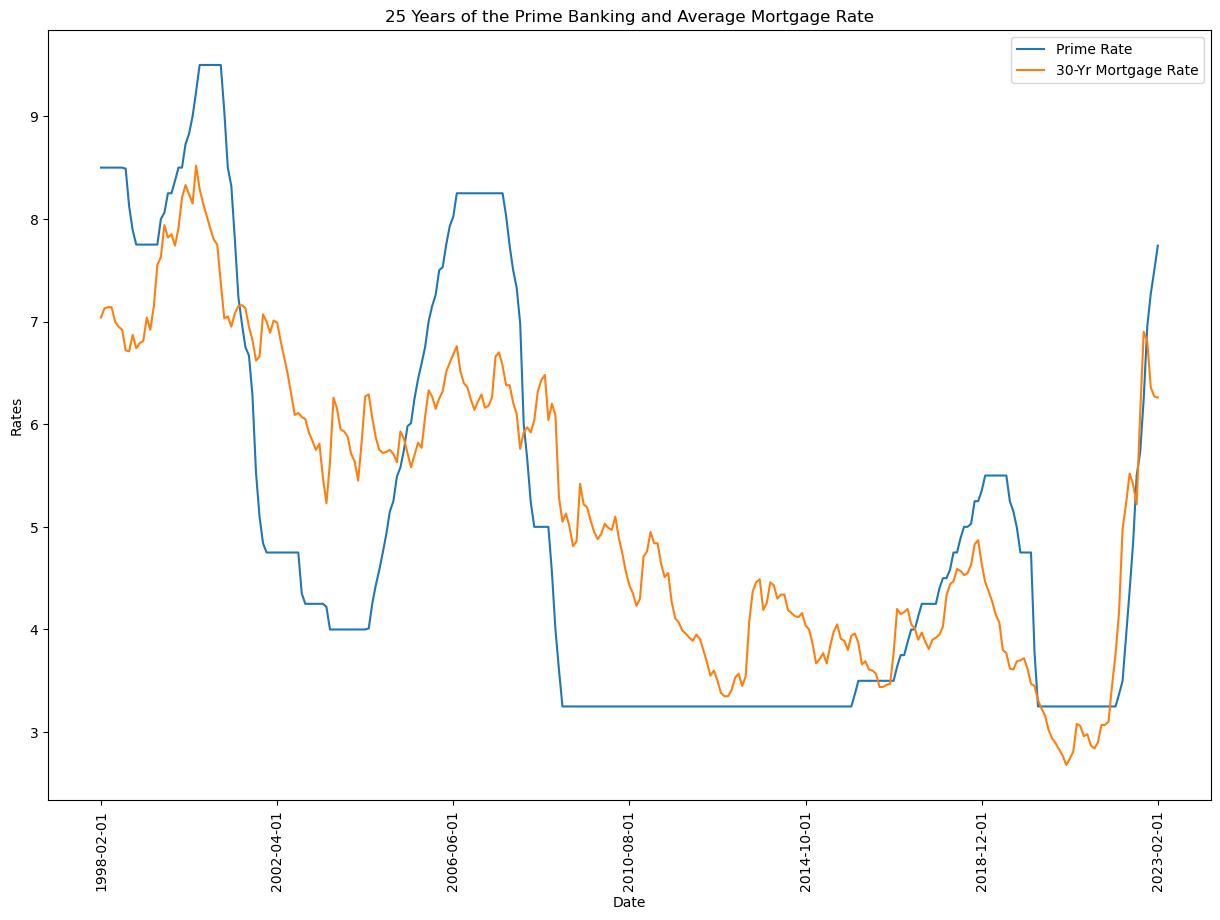

In [32]:
#convert columns into float
_25_year_df=_25year_df.astype(float)
#create line plots with both 25 year series
_25_line_plot=_25_year_df.plot(rot=90,
                xlabel="Date",
                ylabel="Rates",
                title="25 Years of the Prime Banking and Average Mortgage Rate",
                              figsize = (15,10))
_25_line_plot.get_figure().savefig('images/25line.png', bbox_inches="tight", dpi=100)

The r-value is:0.6632493308968419


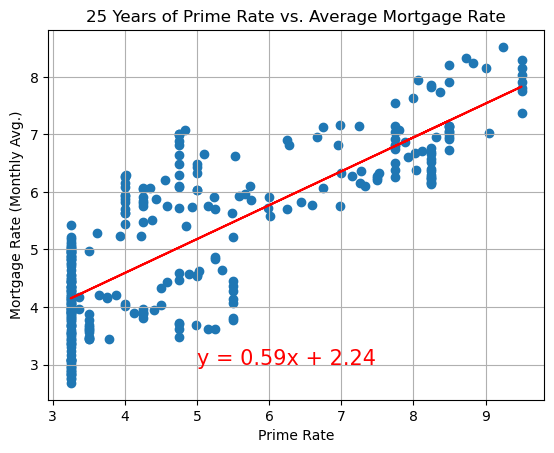

In [33]:
#scatter plot to for 25 year correlation
#convert data to float
x_raw=_25year_df["Prime Rate"]
x_val=x_raw.astype(float)
y_raw=_25year_df["30-Yr Mortgage Rate"]
y_val=y_raw.astype(float)
#plot data
plt.scatter(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
prime_m30_regress=x_val*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val,prime_m30_regress,"r-")
plt.annotate(line_eq,(5,3),fontsize=15,color="red")
plt.xlabel("Prime Rate")
plt.ylabel("Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("25 Years of Prime Rate vs. Average Mortgage Rate")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("images/25yrprimev30yr.png")

# 5 - Year Prime and Mortgage Rate Visualization

The r-value is:0.6690170012485033


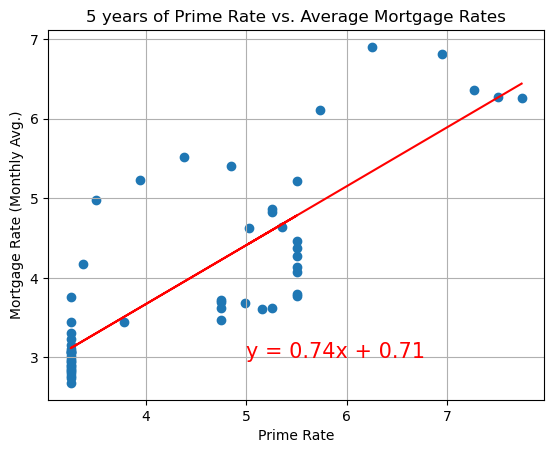

In [34]:
#scatter plot to determine correlation of 5 - year mortgage and prime rates
#convert data to float
x_raw=prime_virt_df["Prime Rate"]
x_val=x_raw.astype(float)
y_raw=M30_virt_df["30-Yr Mortgage Rate"]
y_val=y_raw.astype(float)
#plot data
plt.scatter(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
prime_m30_regress=x_val*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val,prime_m30_regress,"r-")
plt.annotate(line_eq,(5,3),fontsize=15,color="red")
plt.xlabel("Prime Rate")
plt.ylabel("Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("5 years of Prime Rate vs. Average Mortgage Rates")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("images/primev30yr.png")

In [35]:
#combine vertical prime and 30 year Mortgage dataframes for plotting
combine_virt_df=pd.merge(prime_virt_df,M30_virt_df,left_on="Dates", right_on="Dates")
#ensure data is numerical for plotting
_5year_df=combine_virt_df.astype(float)
_5year_df.head()

,Prime Rate,30-Yr Mortgage Rate
Dates,,
2018-09-01,5.03,4.63
2018-10-01,5.25,4.83
2018-11-01,5.25,4.87
2018-12-01,5.35,4.64
2019-01-01,5.50,4.46


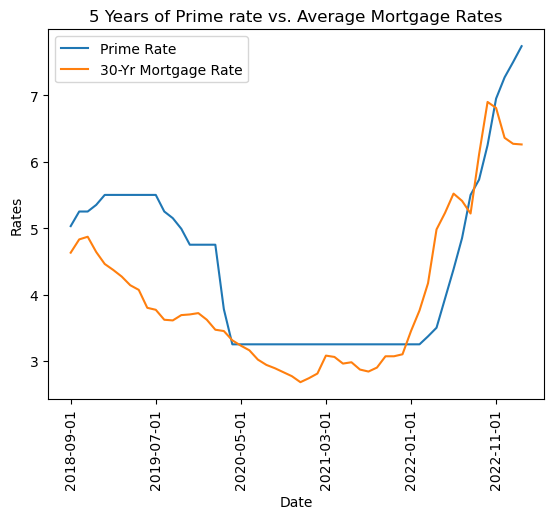

In [36]:
_5year_line=_5year_df.plot(rot=90,
                xlabel="Date",
                ylabel="Rates",
                title="5 Years of Prime rate vs. Average Mortgage Rates")
_5year_line.get_figure().savefig('images/5line.png', bbox_inches="tight", dpi=100)

# Median List Price vs Mortgage Rates Visualization and Analysis

When visualizing the median home list price versus the US mortgage rates over the past five years, it was found there was no linear correlation between these two variables. However, when graphed with a polynomial regression, it was found there was a strong correlation with an r-squared value of .8. This tells us that polymoial regression can be used to potentially graph future predictions regarding the relationshp beween these two variables. It seems as mortage rates increase or decrease, home list prices do the same.This insight can help us further understand how the prime rate effects the 30-year fixed mortgage rate, which then influences the housing market.  

In [37]:
#set SizeRank to index
lr_median_list_price = lr_median_list_price.set_index('SizeRank')

In [38]:
# Set US to index for US comparison graph
lr_median_list_price_us = lr_median_list_price.set_index('RegionName')
lr_median_list_price_us.head()

,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,279633.0,279600.0,279300.0,278933.0,277300.0,275967.0,276633.0,281300.0,287967.0,294567.0,...,362967.0,376300.0,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0
"New York, NY",526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,...,603550.0,610667.0,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0
"Los Angeles, CA",742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,...,904963.0,916596.0,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882646.0
"Chicago, IL",297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,...,309300.0,317967.0,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0
"Dallas, TX",324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,...,407333.0,419330.0,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0


In [39]:
# Import average mortgage rate data from group data folder
lr_mortgage_rate_to_load = 'data/cp_average_mortgage_rate.csv'
average_mortgage_rate = pd.read_csv(lr_mortgage_rate_to_load)
average_mortgage_rate.head()

,Year,Month,Average Rate
0,2018,8,4.5500
1,2018,9,4.6275
2,2018,10,4.8300
3,2018,11,4.8660
4,2018,12,4.6375


The r-value is: 0.23861982527285788


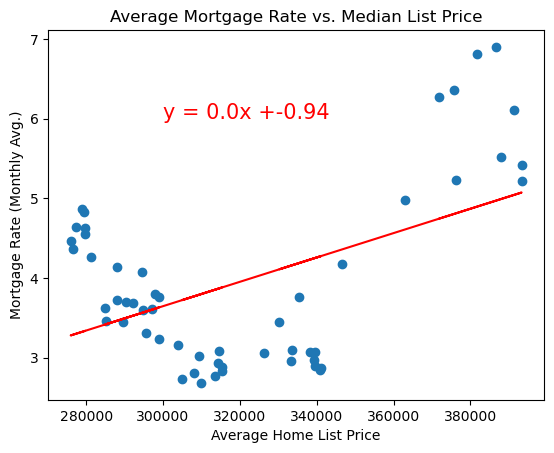

In [40]:
# Linear regression on US Average Mortgage Rate vs US Average Home List Price
us_average_home_list = lr_median_list_price_us.loc['United States']
us_average_home_list=us_average_home_list.astype(float)
us_average_mortgage= average_mortgage_rate['Average Rate']
us_average_mortgage=us_average_mortgage.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(us_average_home_list, us_average_mortgage)
regress_values = us_average_home_list * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(us_average_home_list,us_average_mortgage)
plt.plot(us_average_home_list,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Average Home List Price')
plt.ylabel('Mortgage Rate (Monthly Avg.)')
plt.title("Average Mortgage Rate vs. Median List Price")
plt.annotate(line_eq,(300000,6),fontsize=15,color="red")

# Save the figure to main folder
plt.savefig("images/lr_median_list_corr.png", bbox_inches="tight", dpi=100)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Analysis: When analysing the correlation between the 30-year mortgage rate and the average home list price in the United States using a linear regression, the r-value was found to be .22 which shows no significant correlation and that a linear regression is not suitable for analysing this data set.

The r-squared value is: 0.8294855722356537


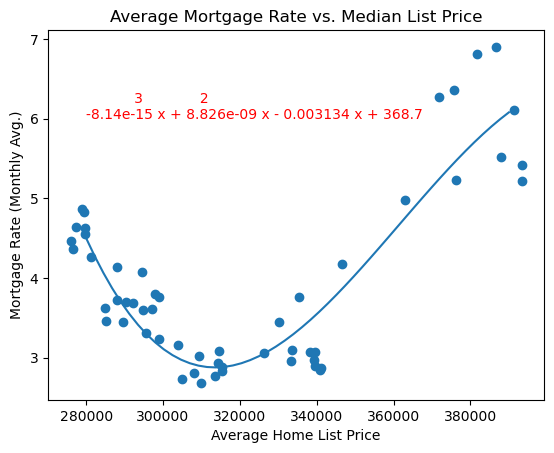

In [41]:
# Complete a ploynomial regression graph since linear regression is not fitting
# Linear regression on US Average Mortgage Rate vs US Average Home List Price
us_average_home_list = lr_median_list_price_us.loc['United States']
us_average_home_list=us_average_home_list.astype(float)
us_average_mortgage= average_mortgage_rate['Average Rate']
us_average_mortgage=us_average_mortgage.astype(float)

#create plot
lr_polynomial_median_list = np.poly1d(np.polyfit(us_average_home_list, us_average_mortgage, 3))

#create regression line
myline = np.linspace(280000, 390000)

# Plot scatter plot and ploynomial regression line
plt.scatter( us_average_home_list, us_average_mortgage)
plt.plot(myline, lr_polynomial_median_list(myline))

#Add x label, y label, and title
plt.xlabel('Average Home List Price')
plt.ylabel('Mortgage Rate (Monthly Avg.)')
plt.title("Average Mortgage Rate vs. Median List Price")
plt.annotate(lr_polynomial_median_list,(280000,6),fontsize=10,color="red")

# Save the figure to main folder
plt.savefig("images/lr_median_list_polynomial.png", bbox_inches="tight", dpi=100)

#Calculate r-squared value
print(f"The r-squared value is: {r2_score(us_average_mortgage, lr_polynomial_median_list(us_average_home_list))}")

plt.show()

Analysis: When analysing the correlation between the 30-year mortgage rate and the average home list price in the United States using a ploynomial regression, the r-value was found to be .83 which shows a possible realtionship and that a ploynomial regression is suitable for analysing this data set. 
This relationship highlights that future predictions can be possibly made that as the US 30-Year Mortgage Rate rises and falls, median US Home List Prices will rise and fall with it. 

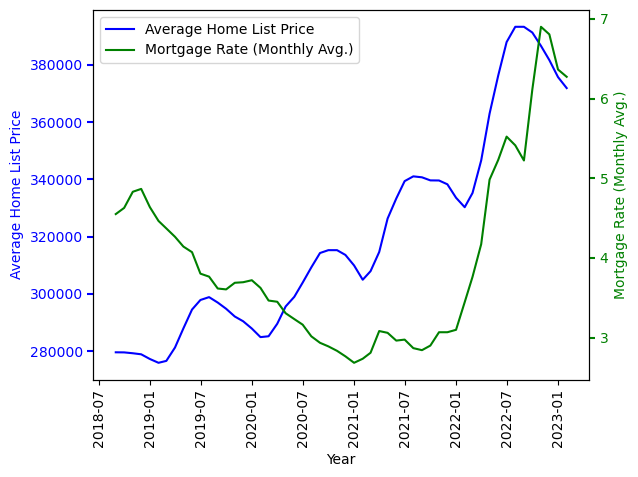

In [42]:
# plot Average US List Price and Average US Mortgage Rate multi-line Plot

# set x and y values
us_average_home_list = lr_median_list_price_us.loc['United States']
us_average_home_list=us_average_home_list.astype(float)

us_average_mortgage= average_mortgage_rate['Average Rate']
us_average_mortgage=us_average_mortgage.astype(float)

years = lr_median_list_price_us.keys()
years_2 = pd.to_datetime(years)

# plot figure using ax subplots for multi-y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

list_price_plot, = ax.plot(years_2, us_average_home_list, color="blue", label="Average Home List Price" )
mortgage_plot, = twin1.plot(years_2, us_average_mortgage, color='green', label="Mortgage Rate (Monthly Avg.)")

# set tick lables, colors, and rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=list_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_plot.get_color(), **tkw)

ax.yaxis.label.set_color(list_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_plot.get_color())

#set labels
ax.set_xlabel('Year')
ax.set_ylabel('Average Home List Price')
twin1.set_ylabel('Mortgage Rate (Monthly Avg.)')

# set legend
ax.legend(handles = [list_price_plot, mortgage_plot])

# Save the figure to main folder
plt.savefig("images/lr_median_list_multi_line.png", bbox_inches="tight", dpi=100)

# show plot
plt.show()

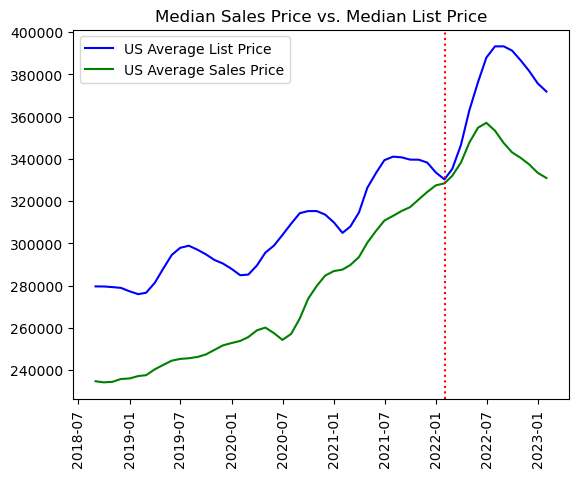

In [44]:
# Multi plot of Average Mortgage rate vs. Average Sales price
list_price = lr_median_list_price_us.loc['United States']
sales_price = cp_median_sale_price_cleaned.loc['United States']

x_axis = lr_median_list_price_us.keys()
x_val_1=pd.to_datetime(x_axis)

list_price_plot, = plt.plot(x_val_1, list_price, color="blue", label="US Average List Price" )

sales_plot, = plt.plot(x_val_1, sales_price, color='green', label="US Average Sales Price")

#Add title
plt.title("Median Sales Price vs. Median List Price")

#Add vertical line where data points meet
plt.axvline(pd.Timestamp('2022-02'),color='r',linestyle="dotted")

plt.xticks(rotation="vertical")
plt.legend(handles=[list_price_plot, sales_plot], loc="best")

# Save the figure to main folder
plt.savefig("images/lr_sales_list_comparison.png", bbox_inches="tight", dpi=100)

plt.show()

Analysis: This graph was used for a visualization so we could look at the average list price vs the average sales price. We can see there is a slight difference with list prices generally trending higher with sales prices lower. When comparing the two r-squared values of the polynomial regression of the median list price vs average mortgage rate (at .8) and median sales price and average mortgage rate (at .6), we can see there is a slightly higher correlation between list prices and the average mortgage rate. This can show a potential insight that list prices follow trends of the mortage rate, while there is a slightly less correlation as far as what homes actually sell for.

# Median Sales Price vs Mortgage Rates Visualization and Analysis

The r-value is:0.09995857775196289


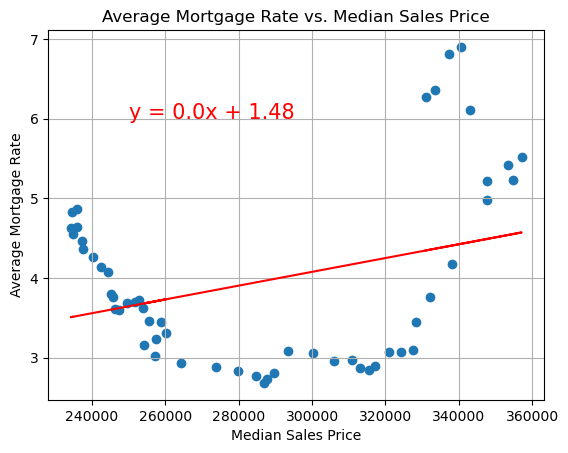

In [45]:
#CHELSEA median sales prive vs average mortgage rate scatter plot + linear regression 
#set x, y values 
x_val=cp_median_sale_price_cleaned.loc['United States']
x_value=x_val.astype(float)
y_val=average_mortgage_rate['Average Rate']
y_value=y_val.astype(float)

#plot data

plt.scatter(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_value, y_value)
median_sales_price_avg_morg_rate=x_value*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,median_sales_price_avg_morg_rate,"r-")
plt.annotate(line_eq,(250000,6),fontsize=15,color="red")
plt.xlabel("Median Sales Price")
plt.ylabel("Average Mortgage Rate")
plt.grid()
plt.title("Average Mortgage Rate vs. Median Sales Price")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("images/MortgageRatevsMedianPrice.png", bbox_inches="tight", dpi=100)

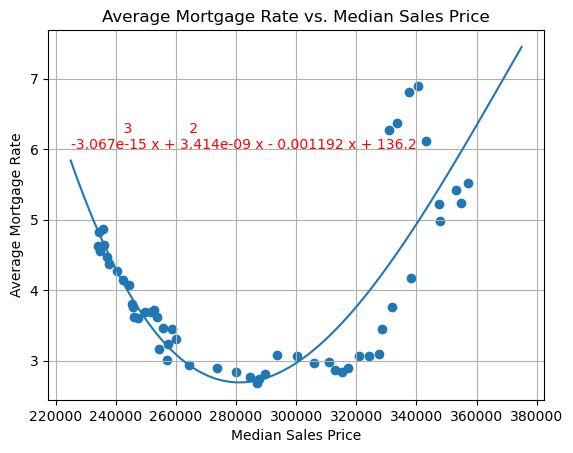

The r-value is: 0.6504054905545287


In [46]:
# CHELSEA median sales prive vs average mortgage rate scatter plot + polynomial regression 
#set x & y values 
x_val=cp_median_sale_price_cleaned.loc['United States']
y_val=average_mortgage_rate['Average Rate']

#polynomial regression equation
poly_reg = np.poly1d(np.polyfit(x_val, y_val, 3))
poly_line = np.linspace(225000, 375000, 100)

plt.scatter(x_val, y_val)
plt.plot(poly_line, poly_reg(poly_line))
plt.xlabel("Median Sales Price")
plt.ylabel("Average Mortgage Rate")
plt.grid()
plt.title("Average Mortgage Rate vs. Median Sales Price")
plt.annotate(poly_reg,(225000,6),fontsize=10,color="red")
plt.savefig("images/cp_MortgageRatevsMedianPricePolynomial.png", bbox_inches="tight", dpi=100)
plt.show()
print(f'The r-value is: {r2_score(y_val, poly_reg(x_val))}')


# Correlation Between Median Sales Price and Average Mortgage Rate
To determine the correlation between the average mortgage rate and the median sales price a scatter plot with a linear regression calculation was performed. The results show an r-value of 0.099 indicating an extremely weak positive linear relationship. With this r value we can proceed with further analyzation with the understanding that median sales price and average mortgage rate will not increase or decrease with certainty with respect to the other variable. This finding points to a non-linear relationship between median sales price and average mortgage rate therefore a polynomial regression line was calculated. The results show an r value of 0.65, a moderate to strong correlation between these two variables. This tells us that as one variable increases or decreases there will be a non-linear change to the other variable.

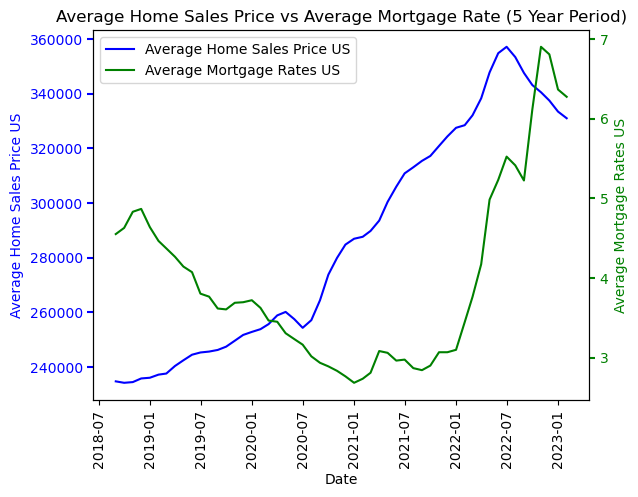

In [47]:
#CHELSEA plot median us sales price and average mortgage rate multi-line plot
#set x,y values
average_sales_price_us = cp_median_sale_price_cleaned.loc['United States']
average_sales_price_us = average_sales_price_us.astype(float)

average_mortgage_rate_us = average_mortgage_rate['Average Rate']
average_mortgage_rate_us = average_mortgage_rate_us.astype(float)

date = cp_median_sale_price_cleaned.keys()
date_2 = pd.to_datetime(date)

#plot figure with ax subplots for multi y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

sales_price_plot, = ax.plot(date_2, average_sales_price_us, color="blue", label="Average Home Sales Price US")
mortgage_rate_plot, = twin1.plot(date_2, average_mortgage_rate_us, color="green", label="Average Mortgage Rates US")

#set tick labels, colors, rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=sales_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_rate_plot.get_color(), **tkw)

ax.yaxis.label.set_color(sales_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_rate_plot.get_color())    

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Sales Price US')
twin1.set_ylabel("Average Mortgage Rates US")

#set legend
ax.legend(handles = [sales_price_plot, mortgage_rate_plot])
plt.title("Average Home Sales Price vs Average Mortgage Rate (5 Year Period)")
# Save the figure
plt.savefig("images/cp_AverageSalesPrice_AverageMortgageRate.png", bbox_inches="tight", dpi=100)

#show plot
plt.show()


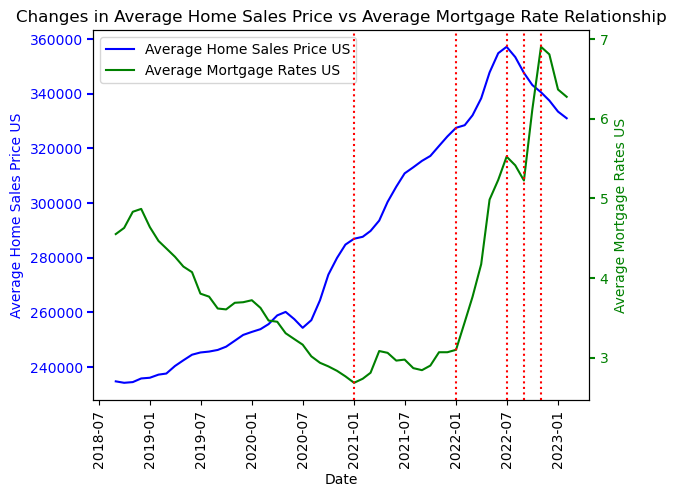

In [48]:
#add vline to points when relationship changed
#plot median us sales price and average mortgage rate multi-line plot

#set x,y values
average_sales_price_us = cp_median_sale_price_cleaned.loc['United States']
average_sales_price_us = average_sales_price_us.astype(float)

average_mortgage_rate_us = average_mortgage_rate['Average Rate']
average_mortgage_rate_us = average_mortgage_rate_us.astype(float)

date = cp_median_sale_price_cleaned.keys()
date_2 = pd.to_datetime(date)

#plot figure with ax subplots for multi y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

sales_price_plot, = ax.plot(date_2, average_sales_price_us, color="blue", label="Average Home Sales Price US")
mortgage_rate_plot, = twin1.plot(date_2, average_mortgage_rate_us, color="green", label="Average Mortgage Rates US")

#set tick labels, colors, rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=sales_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_rate_plot.get_color(), **tkw)

ax.yaxis.label.set_color(sales_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_rate_plot.get_color())    

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Sales Price US')
twin1.set_ylabel("Average Mortgage Rates US")
ax.legend(handles = [sales_price_plot, mortgage_rate_plot])
#plot vlines at points where relationship changes
plt.axvline(pd.Timestamp('2021-01-01'),color='r',linestyle="dotted")
plt.axvline(pd.Timestamp('2022-01-01'),color='r',linestyle="dotted")
plt.axvline(pd.Timestamp('2022-07-01'),color='r',linestyle="dotted")
plt.axvline(pd.Timestamp('2022-09-01'),color='r',linestyle="dotted")
plt.axvline(pd.Timestamp('2022-11-01'),color='r',linestyle="dotted")
# Save the figure
plt.savefig("images/cp_ChangeRelationshipSalesPricevsMortRate.png", bbox_inches="tight", dpi=100)
plt.title("Changes in Average Home Sales Price vs Average Mortgage Rate Relationship")
#show plot
plt.show()


# Analysis of the Average Home Sales Price and the Average Mortgage Rate Relationship
The average home sales price and average mortgate rate relationship was further analyzed by plotting a multiline graph over the same five year period. Interesting observations about this graph are that for the five year period examined the relationship of average home sales price and average mortgage rates appears to change throughout the time period. Five vertical lines were added at the time points where the changes appear to occur which were: January 2021, January 2022, July 2022, September 2021 and November 2021. From July 2018 to January 2021 there is a clear inverse relationship showing a steady increase in average home sales and a steady decrease in mortgage rates. January 2021 shows a change in the trajectory of the average mortgage rate which is now on a slight increase. A year later, the slope of the mortgage rate line increases and both the home sales price and mortgage rate lines increase. There is a short-lived change back to an inverse relationship from September 1st to November 1st, however after November 1st the relationship appears to revert back to both lines sharing the same trajectory only this time both are decreasing. By showing the points in time where the relationship appears to change, it is easier to observe the dynamic relationship between average mortgage rates and median home sales prices over this time period. Identifying these points can allow for further analysis into the relationship between average home sales price and average mortgae rate as well as potential causation related to external factors. 

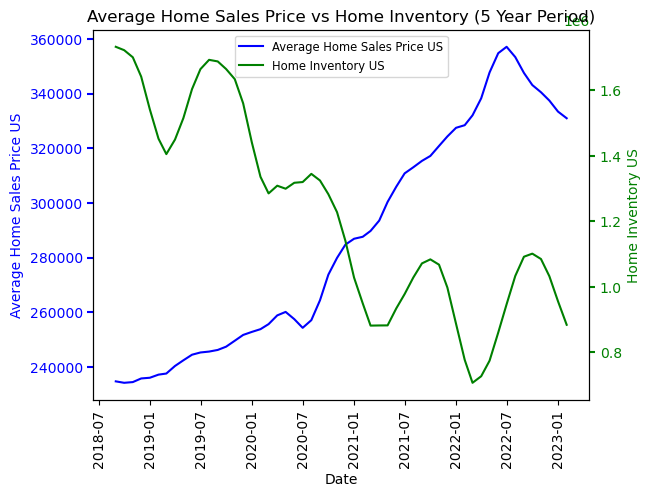

In [49]:
#CHELSEA plot median us sales price and home inventory multi-line plot
#set x,y values
average_sales_price_us = cp_median_sale_price_cleaned.loc['United States']
average_sales_price_us = average_sales_price_us.astype(float)

home_inventory_us = bc_inventory_cleaned.loc['United States']
home_inventory_us = home_inventory_us.astype(float)

date = cp_median_sale_price_cleaned.keys()
date_2 = pd.to_datetime(date)

#plot figure with ax subplots for multi y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

sales_price_plot, = ax.plot(date_2, average_sales_price_us, color="blue", label="Average Home Sales Price US")
inventory_plot, = twin1.plot(date_2, home_inventory_us, color="green", label="Home Inventory US")

#set tick labels, colors, rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=sales_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=inventory_plot.get_color(), **tkw)

ax.yaxis.label.set_color(sales_price_plot.get_color())
twin1.yaxis.label.set_color(inventory_plot.get_color())    

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Sales Price US')
twin1.set_ylabel("Home Inventory US")

#set legend
ax.legend(handles = [sales_price_plot, inventory_plot], loc='upper center', fontsize='small')
plt.title("Average Home Sales Price vs Home Inventory (5 Year Period)")
# Save the figure
plt.savefig("images/cp_AverageSalesPrice_HomeInventory.png", bbox_inches="tight", dpi=100)

#show plot
plt.show()


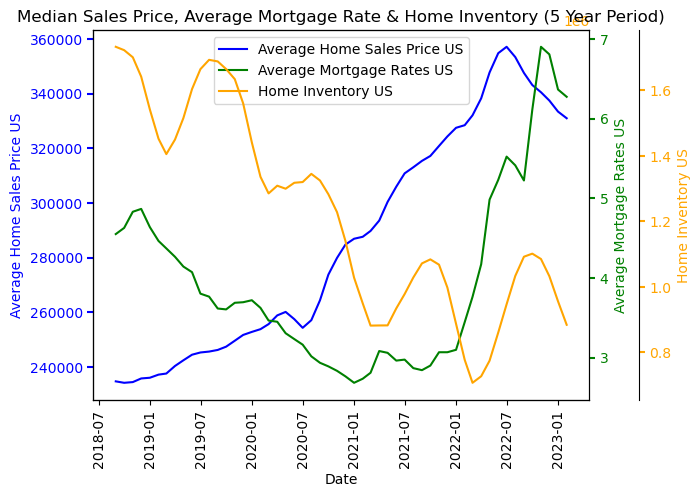

In [50]:
#plot median us sales price, average mortgage rate and home inventory multi-line plot
#set x,y values
average_sales_price_us = cp_median_sale_price_cleaned.loc['United States']
average_sales_price_us = average_sales_price_us.astype(float)

average_mortgage_rate_us = average_mortgage_rate['Average Rate']
average_mortgage_rate_us = average_mortgage_rate_us.astype(float)

home_inventory_us = bc_inventory_cleaned.loc['United States']
home_inventory_us = home_inventory_us.astype(float)

date = cp_median_sale_price_cleaned.keys()
date_2 = pd.to_datetime(date)

#plot figure with ax subplots for multi y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin2 = ax.twinx()

sales_price_plot, = ax.plot(date_2, average_sales_price_us, color="blue", label="Average Home Sales Price US")
mortgage_rate_plot, = twin1.plot(date_2, average_mortgage_rate_us, color="green", label="Average Mortgage Rates US")
inventory_plot, = twin2.plot(date_2, home_inventory_us, color="orange", label="Home Inventory US")

#set tick labels, colors, rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=sales_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_rate_plot.get_color(), **tkw)
twin2.tick_params(axis='y', colors=inventory_plot.get_color(), **tkw)

ax.yaxis.label.set_color(sales_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_rate_plot.get_color())    
twin2.yaxis.label.set_color(inventory_plot.get_color())   

#set labels
ax.set_xlabel('Date')
ax.set_ylabel('Average Home Sales Price US')
twin1.set_ylabel("Average Mortgage Rates US")
twin2.set_ylabel("Home Inventory US")
ax.legend(handles = [sales_price_plot, mortgage_rate_plot, inventory_plot], loc='upper center')
twin2.spines.right.set_position(("axes", 1.1))
# Save the figure
plt.savefig("images/AverageSalesPrice_AverageMortgageRate.png", bbox_inches="tight", dpi=100)
plt.title("Median Sales Price, Average Mortgage Rate & Home Inventory (5 Year Period)")
#show plot
plt.show()

Analysis

The r-value is:0.7528325888827002


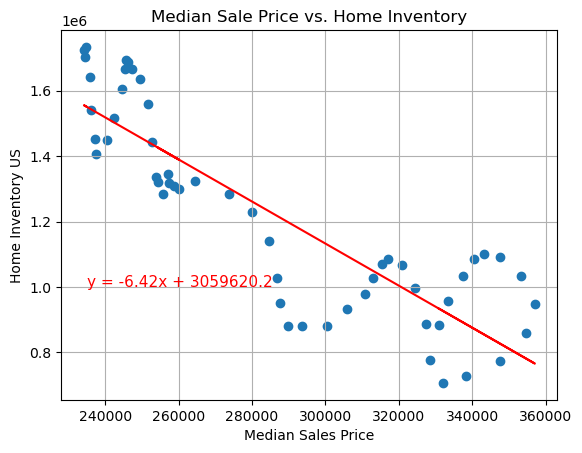

In [51]:
#CHELSEA scatter plot + linear regression median sales price + home inventory
#set x, y values
x_val=cp_median_sale_price_cleaned.loc['United States']
x_value=x_val.astype(float)

y_val=bc_inventory_cleaned.loc['United States']
y_value=y_val.astype(float)

#plot data, linear reg line + equation,print r value
plt.scatter(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_value, y_value)
median_sales_price_home_inventory=x_value*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,median_sales_price_home_inventory,"r-")
plt.annotate(line_eq,(235000,1e6),fontsize=11,color="red")
plt.xlabel("Median Sales Price")
plt.ylabel("Home Inventory US")
plt.grid()
plt.title("Median Sale Price vs. Home Inventory")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("images/MedianSalePricevsInventoryScatter.png", bbox_inches="tight", dpi=100)

# Correlation of Median Home Sales Price and Home Inventory
The relationship between the average median sales price and home inventory was analyzed to determine to what degree these variables are correlated. A scatterplot graph was created and a linear regression was calculated. The resulting r value was 0.75, confirming a strong positive linear relationship between home inventory and median sales price. A multiline graph was plotted for further observations. When examining this graph it is apparent that this relationship looks very similar to a supply and demand curve. This is an expected result considering we are analyzing the real estate market, which is like all other markets, a place where buyers and sellers exchange goods and services. To further emphasize, when the inventory of homes is at it's lowest point on the graph (March 2022), median home sales prices are at their highest. When inventory increased, the 6-9 months following, the median sales prices began to decrease.  Considering the fluctuating changes noticed in the relationship between sales price and mortgage rate, it is somewhat of a surprise that the relationship between the home inventory and sales price for this time period is quite consistent. At this phase in the analysis, this could mean that the although the mortgage rate and sales price had a dynamic relationship in this period of time, the real estate market is fairly predictable. Further analysis will likely uncover a more nuanced relationship between the federal fund rate, the average mortgage rate, the average sales price and home inventory in the United States. 

# Home Inventory and Analysis

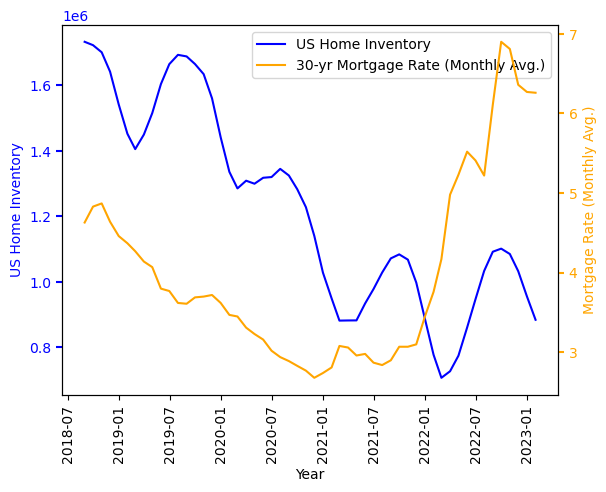

In [52]:
# plot Average US List Price and Average US Mortgage Rate multi-line Plot
#convert column names to series
x_raw=pd.Series(bc_inventory_cleaned.columns)
#convert strings to datetime type
x_val=pd.to_datetime(x_raw)
# prepare Series for the lines
us_home_inventory = bc_inventory_cleaned.loc["United States"]
us_home_inventory=us_home_inventory.astype(float)
us_average_mortgage=M30_virt_df["30-Yr Mortgage Rate"]
us_average_mortgage=us_average_mortgage.astype(float)
# plot figure using ax subplots for multi-y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()
inventory_plot, = ax.plot(x_val, us_home_inventory, color="blue", label="US Home Inventory" )
mortgage_plot, = twin1.plot(x_val, us_average_mortgage, color='orange', label="30-yr Mortgage Rate (Monthly Avg.)")
# set tick lables, colors, and rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=inventory_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_plot.get_color(), **tkw)
ax.yaxis.label.set_color(inventory_plot.get_color())
twin1.yaxis.label.set_color(mortgage_plot.get_color())
#set labels
ax.set_xlabel('Year')
ax.set_ylabel('US Home Inventory')
twin1.set_ylabel('Mortgage Rate (Monthly Avg.)')
# set legend
ax.legend(handles = [inventory_plot, mortgage_plot])
# show plot
plt.show()

The r-value is:0.007782614697515186


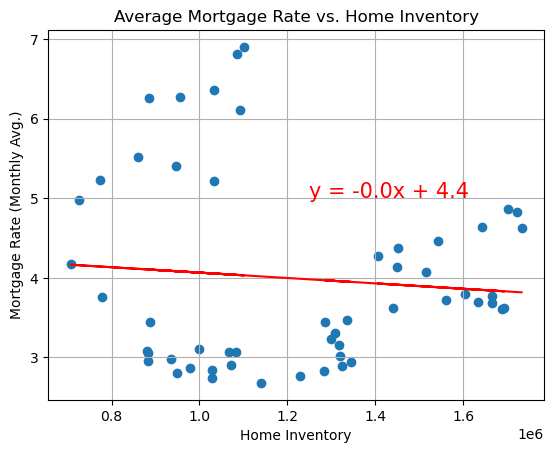

In [53]:
#Display Avg Mortgage Rate vs Home Inventory
#prepare data and convert to float
x_raw=bc_inventory_cleaned.loc["United States"]
x_val=x_raw.astype(float)
y_raw=M30_virt_df["30-Yr Mortgage Rate"]
y_val=y_raw.astype(float)
#scatter plot
plt.scatter(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
inv_m30_regress=x_val*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val,inv_m30_regress,"r-")
plt.annotate(line_eq,(1250000,5),fontsize=15,color="red")
plt.xlabel("Home Inventory")
plt.ylabel("Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("Average Mortgage Rate vs. Home Inventory")
print(f'The r-value is:{rvalue*rvalue}')


With an r-squared of less than 1 hundredth, its very clear there is no linear correlation.

The r-squared value is: -16.334739213258604


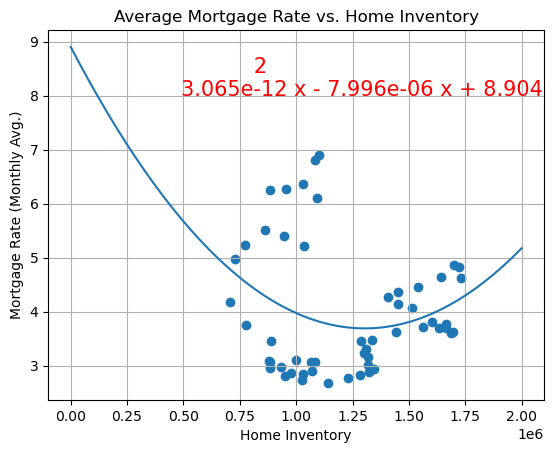

In [54]:
#try a polynomial regression here
poly_inv_mort=np.poly1d(np.polyfit(x_val, y_val, 2))

#create regression line
myline = np.linspace(0, 2000000)

#Scatter plot
plt.scatter(x_val, y_val)
plt.plot(myline, poly_inv_mort(myline))
plt.xlabel("Home Inventory")
plt.ylabel("Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("Average Mortgage Rate vs. Home Inventory")
plt.annotate(poly_inv_mort,(490000,8),fontsize=15,color="red")
#Calculate r-squared value
print(f"The r-squared value is: {r2_score(x_val, poly_inv_mort(x_val))}")

That doesn't really look any better, whatever correlation there is may be multiple degrees removed from the mortgage rate itself.

# Analysis of Home Inventory

Perhaps the most surprising conclusion regarding home inventory is that--despite the logical correlation with sales price and sales price's correlation with the mortgage rate--that there doesn't really seem to be a correlation with mortgage rate, at least one thats obvious without additional research. One thing that may require adjustment to expose a correlation is that home inventory seems to fluctuate by season: more homes are built and go on market in the Spring/Summer, and less go on market in the Fall/Winter. It's also interesting that the post-Covid-19 inventory is not reaching the peaks it used to before the pandemic.

# External Events, Different Markets and Further Analysis

In [55]:
#Prepare Data to consider External Events
#convert column names to series
x_25=pd.Series(prime_25_date)
x_5=pd.Series(prime_date)
#convert strings to datetime type
x_25=pd.to_datetime(x_25)
x_5=pd.to_datetime(x_5)
#isolate Prime and Mortgage rates by timeframe
#Prime
prime_5=prime_virt_df["Prime Rate"].astype(float)
prime_25=_25year_df["Prime Rate"].astype(float)
#Mortgage
mort_5=M30_virt_df["30-Yr Mortgage Rate"].astype(float)
mort_25=_25year_df["30-Yr Mortgage Rate"].astype(float)

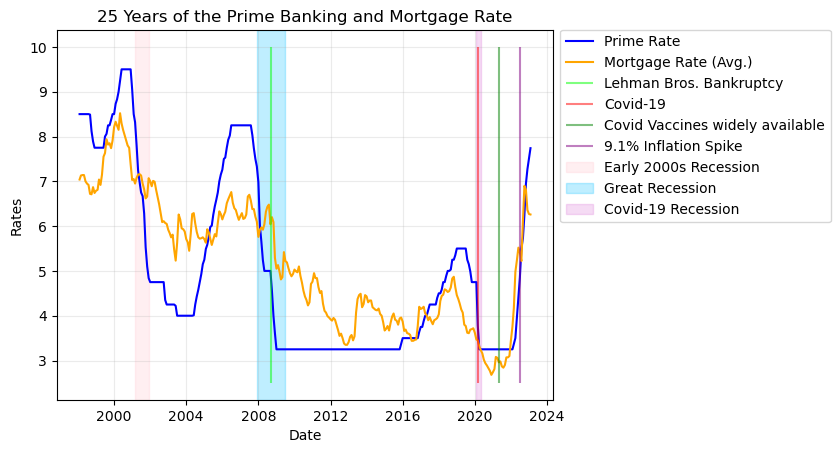

In [56]:
#25 years with events
#recreate basic graph
plt.plot(x_25, prime_25, color="blue", label="Prime Rate")
plt.plot(x_25, mort_25, color="orange", label="Mortgage Rate (Avg.)")
plt.xlabel("Date")
plt.ylabel("Rates")
plt.grid(alpha=.25)
plt.title("25 Years of the Prime Banking and Mortgage Rate")

#add events
plt.vlines(datetime.date(2008, 9, 7), ymin=2.5, ymax=10, alpha=.5, colors='lime',label="Lehman Bros. Bankruptcy")
plt.vlines(datetime.date(2020, 3, 9), ymin=2.5, ymax=10, alpha=.5, colors='red',label="Covid-19")
plt.vlines(datetime.date(2021, 5, 1), ymin=2.5, ymax=10, alpha=.5, colors='green',label="Covid Vaccines widely available")
plt.vlines(datetime.date(2022, 6, 30), ymin=2.5, ymax=10, alpha=.5, colors='purple',label="9.1% Inflation Spike")

#plot official recessions
plt.axvspan(datetime.date(2001, 3, 1), datetime.date(2001, 11, 30), color='pink', alpha=.25, label="Early 2000s Recession")
plt.axvspan(datetime.date(2007, 12, 1), datetime.date(2009, 6, 30), color='deepskyblue', alpha=.25, label="Great Recession")
plt.axvspan(datetime.date(2020, 2, 1), datetime.date(2020, 4, 30), color='orchid', alpha=.25, label="Covid-19 Recession")
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left")

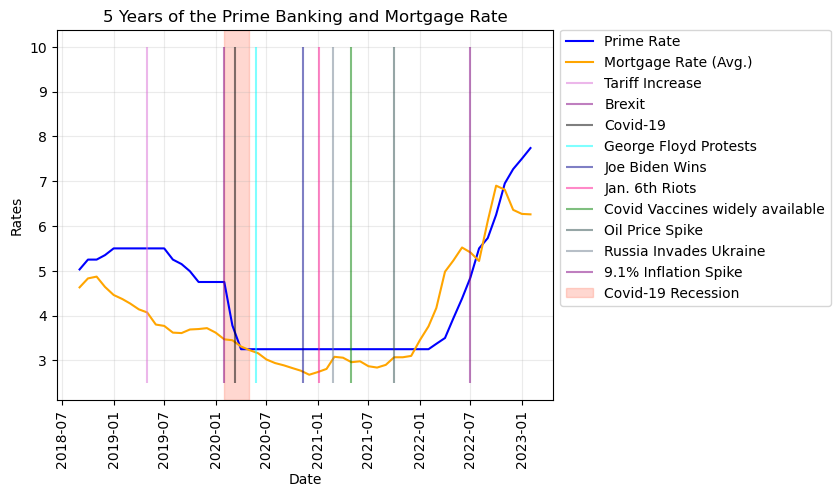

In [57]:
#5 years with events
#recreate basic graph
plt.plot(x_5, prime_5, color="blue", label="Prime Rate")
plt.plot(x_5, mort_5, color="orange", label="Mortgage Rate (Avg.)")
plt.xlabel("Date")
plt.ylabel("Rates")
plt.grid(alpha=.25)
plt.xticks(rotation = 90)
plt.title("5 Years of the Prime Banking and Mortgage Rate")

#add events
plt.vlines(datetime.date(2019, 5, 1), ymin=2.5, ymax=10, alpha=.5, colors='orchid',label="Tariff Increase")
plt.vlines(datetime.date(2020, 1, 31), ymin=2.5, ymax=10, alpha=.5, colors='purple',label="Brexit")
plt.vlines(datetime.date(2020, 3, 9), ymin=2.5, ymax=10, alpha=.5, colors='black',label="Covid-19")
plt.vlines(datetime.date(2020, 5, 26), ymin=2.5, ymax=10, alpha=.5, colors='cyan',label="George Floyd Protests")
plt.vlines(datetime.date(2020, 11, 7), ymin=2.5, ymax=10, alpha=.5, colors='darkblue',label="Joe Biden Wins")
plt.vlines(datetime.date(2021, 1, 6), ymin=2.5, ymax=10, alpha=.5, colors='deeppink',label="Jan. 6th Riots")
plt.vlines(datetime.date(2021, 5, 1), ymin=2.5, ymax=10, alpha=.5, colors='green',label="Covid Vaccines widely available")
plt.vlines(datetime.date(2021, 10, 1), ymin=2.5, ymax=10, alpha=.5, colors='darkslategrey',label="Oil Price Spike")
plt.vlines(datetime.date(2021, 2, 24), ymin=2.5, ymax=10, alpha=.5, colors='slategray',label="Russia Invades Ukraine")
plt.vlines(datetime.date(2022, 6, 30), ymin=2.5, ymax=10, alpha=.5, colors='purple',label="9.1% Inflation Spike")

#plot official recessions
plt.axvspan(datetime.date(2020, 2, 1), datetime.date(2020, 4, 30), color='tomato', alpha=.25, label="Covid-19 Recession")
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left")

# Different Markets

In [58]:
#remove United States from inventory DataFrame to explore markets
top_markets=bc_inventory_cleaned.copy()
top_markets.drop(index="United States", inplace=True)
top_markets.columns=x_5

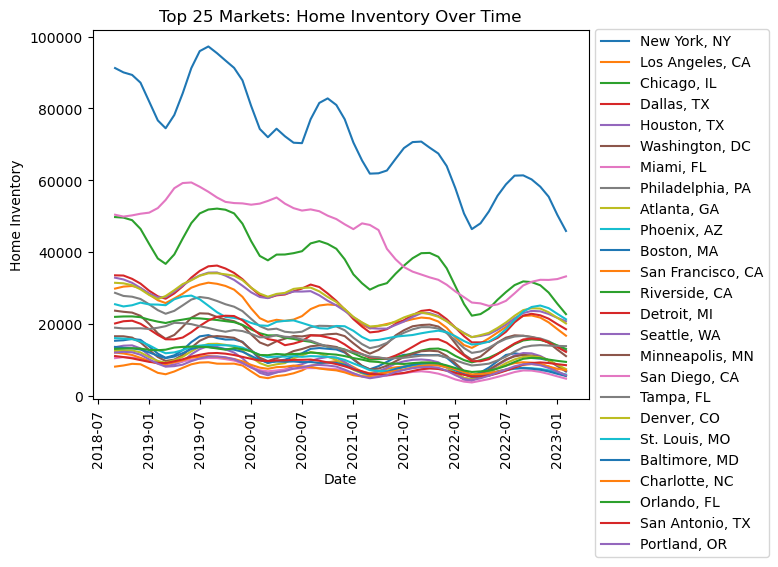

In [59]:
#Full Top25 Markets graph
for index, row in top_markets.iterrows():
    market_y=top_markets.loc[index].astype(float)
    plt.plot(x_5, market_y,label=index)
plt.xlabel("Date")
plt.ylabel("Home Inventory")
plt.xticks(rotation = 90)
plt.title("Top 25 Markets: Home Inventory Over Time")
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left")

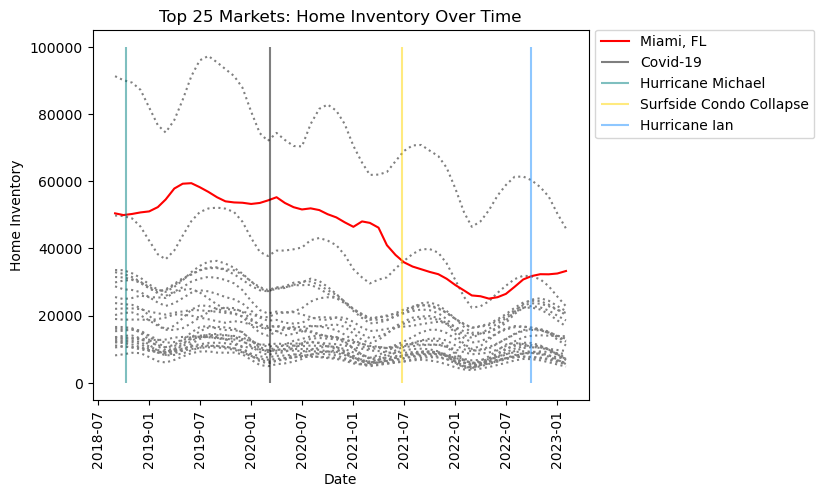

In [60]:
#isolate the Miami, FL market
for index, row in top_markets.iterrows():
    market_y=top_markets.loc[index].astype(float)
    if index == "Miami, FL":
        plt.plot(x_5, market_y, color="red", label=index),
    else:
        plt.plot(x_5, market_y, color="grey", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("Home Inventory")
plt.xticks(rotation = 90)
plt.title("Top 25 Markets: Home Inventory Over Time")
plt.vlines(datetime.date(2020, 3, 9), ymin=1, ymax=100000, alpha=.5, colors='black',label="Covid-19")
plt.vlines(datetime.date(2018, 10, 10), ymin=2.5, ymax=100000, alpha=.5, colors='teal',label="Hurricane Michael")
plt.vlines(datetime.date(2021, 6, 24), ymin=2.5, ymax=100000, alpha=.5, colors='Gold',label="Surfside Condo Collapse")
plt.vlines(datetime.date(2022, 9, 28), ymin=2.5, ymax=100000, alpha=.5, colors='dodgerblue',label="Hurricane Ian")
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left")

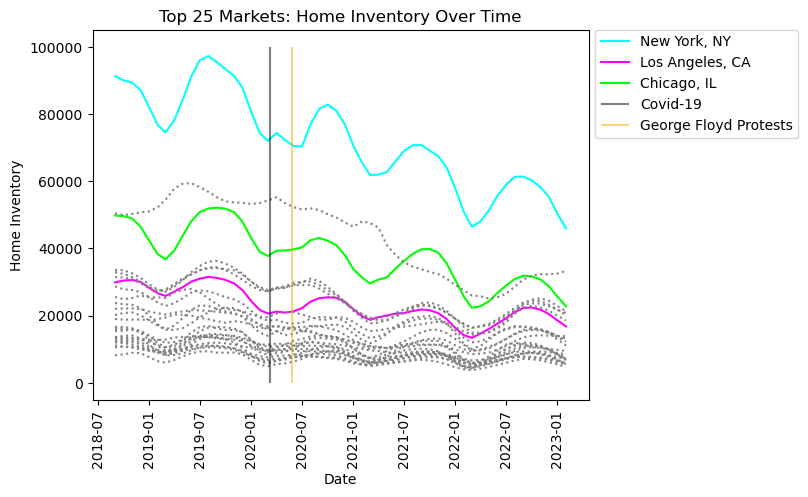

In [61]:
#isolate heavily urbanized markets
for index, row in top_markets.iterrows():
    market_y=top_markets.loc[index].astype(float)
    if index == "New York, NY":
        plt.plot(x_5, market_y, color="cyan", label=index),
    elif index == "Chicago, IL":
        plt.plot(x_5, market_y, color="lime", label=index)
    elif index == "Los Angeles, CA":
        plt.plot(x_5, market_y, color="magenta", label=index)
    else:
        plt.plot(x_5, market_y, color="grey", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("Home Inventory")
plt.xticks(rotation = 90)
plt.title("Top 25 Markets: Home Inventory Over Time")
plt.vlines(datetime.date(2020, 3, 9), ymin=1, ymax=100000, alpha=.5, colors='black',label="Covid-19")
plt.vlines(datetime.date(2020, 5, 26), ymin=2.5, ymax=100000, alpha=.5, colors='orange',label="George Floyd Protests")
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left")

# Summary of External Events, Markets, and Further Questions

Exploring externalities would have made for a very interesting project on its own. The effect of recessions seems largely obvious, and largely matched expectations. Miami's seeming independence from the rest of the United States, and the differences between heavily urbanized markets and less dense ones are worth exploring. It's worth noting most of the above data in this section is all Home Inventory, and the difference with other metrics in the different regions and in response to different stimuli could be worth exploring. One unifying factor was that Covid-19 resulted in a sudden halt in what would normally be a seasonal rise in inventory. 

One major question that is worth asking (and which has a surprising contrast to the apparent continued strength of the Miami market) is what effect could climate change on these markets, especially on the coastlines and dry interiors of the US. 